201977it [00:01, 153288.23it/s]


# train:  162257 , # test:  19906 , # val: 19814
# of files :  201977
(687, 409, 3)
(687, 409, 3)


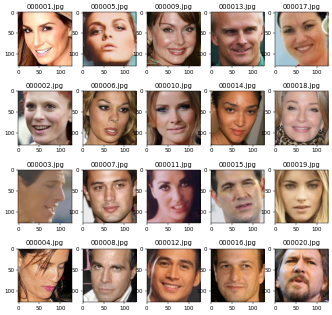

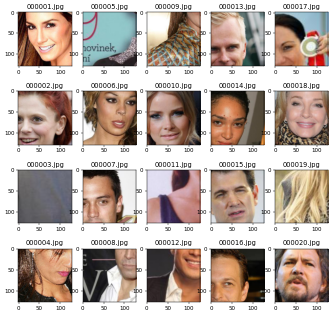

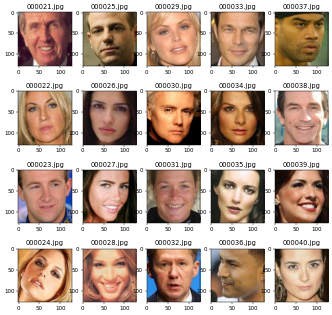

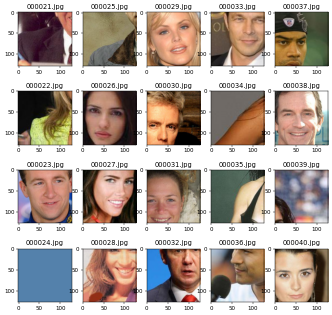

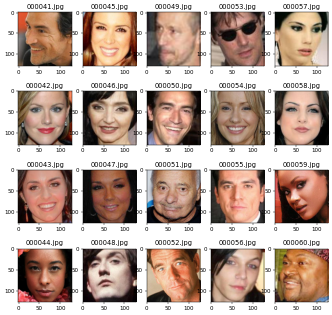

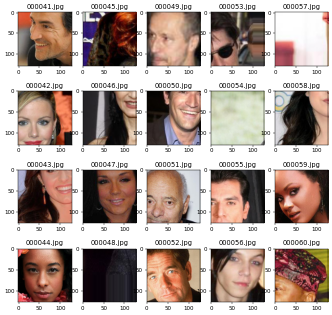

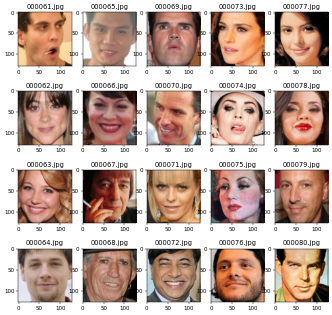

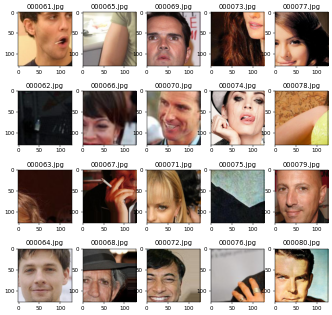

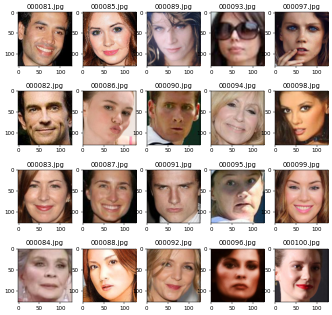

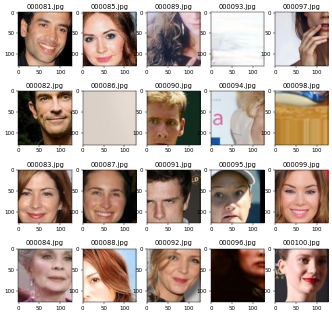

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import os.path as path
import csv
from tqdm import tqdm
import cv2

celeba_PATH = '/root/datasets/CelebA/img_celeba/img_celeba'
celeba_bbox_PATH = '/root/datasets/CelebA/celeba_crop_bbox.txt'

bbox_inf = []
file_list = []
n_train = 0
n_test = 0
n_val = 0
with open(celeba_bbox_PATH) as tsv:
    for line in tqdm(csv.reader(tsv, delimiter = ' ')):
        file_list.append(line[0])
        bbox_inf.append(line[2:])
        
        if line[1] == "0":
            n_train += 1
        elif line[1] == "1":
            n_val += 1
        else:
            n_test +=1

        # check whether all bbox is square or not.

        if line[4] != line[5]:
            print(line)


print("# train: ",n_train, ", # test: ", n_test, ", # val:", n_val)
print("# of files : ", len(file_list))


#plot first 20 images & check the size
for j in range(5):
    fig, axs = plt.subplots(4, 5, figsize = (10,10), dpi = 40)
    for i in range(20):
        ind = i + j*20
        img = mpimg.imread(path.join(celeba_PATH, file_list[ind]))
        if ind==0:
            print(img.shape)
        x = int(bbox_inf[ind][0])
        y = int(bbox_inf[ind][1])
        w = int(bbox_inf[ind][2])
        h = int(bbox_inf[ind][3])

        '''pad imgs when bbox is out of img'''
        x_front = 0   # offset for the case when we padded in front of the img.
        y_front = 0
        x_back = 0
        y_back = 0
        
        if x<0:
            x_front = -x
        if y<0:
            y_front = -y
        if x+w>= img.shape[0]:
            x_back = x+w-img.shape[0]+1
        if y+h>=img.shape[1]:
            y_back = y+w-img.shape[1]+1

        if x_front+y_front+x_back+y_back > 0:
            img = cv2.copyMakeBorder(img, x_front, x_back, y_front, y_back, cv2.BORDER_REPLICATE)
            x = x + x_front
            y = y + y_front

        crop_img = img[y:(y+h),x:(x+w),:]
        re_crop_img = cv2.resize(crop_img, dsize=(128,128), interpolation = cv2.INTER_LINEAR)
        

        axs[i%4, i//4].imshow(re_crop_img)
        axs[i%4, i//4].set_title(file_list[ind])


    fig, axs = plt.subplots(4, 5, figsize = (10,10), dpi = 40)
    for i in range(20):
        ind = i + j*20
        img = mpimg.imread(path.join(celeba_PATH, file_list[ind]))
        if ind==0:
            print(img.shape)
        x = int(bbox_inf[ind][0])
        y = int(bbox_inf[ind][1])
        w = int(bbox_inf[ind][2])
        h = int(bbox_inf[ind][3])

        '''pad imgs when bbox is out of img'''
        x_front = 0   # offset for the case when we padded in front of the img.
        y_front = 0
        x_back = 0
        y_back = 0
        
        if x<0:
            x_front = -x
        if y<0:
            y_front = -y
        if x+w>= img.shape[0]:
            x_back = x+w-img.shape[0]+1
        if y+h>=img.shape[1]:
            y_back = y+w-img.shape[1]+1

        if x_front+y_front+x_back+y_back > 0:
            img = cv2.copyMakeBorder(img, x_front, x_back, y_front, y_back, cv2.BORDER_REPLICATE)
            x = x + x_front
            y = y + y_front

        crop_img = img[x:(x+w),y:(y+h),:]
        re_crop_img = cv2.resize(crop_img, dsize=(128,128), interpolation = cv2.INTER_LINEAR)
        

        axs[i%4, i//4].imshow(re_crop_img)
        axs[i%4, i//4].set_title(file_list[ind])

    


